In [1]:
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
print("Setup Complete")

Setup Complete


#### Creating a synthetic regression dataset

In [2]:
# from sklearn.datasets import make_regression

# X, y, coef = make_regression(
#     n_features=1,
#     coef=True,
#     random_state=0
# )
# X = pd.DataFrame(X)
# y = pd.Series(y)

n_samples = 1000
X = np.linspace(-2, 2, n_samples)
coef = np.random.rand()*10
y = coef * X + np.random.normal(size=n_samples)

9.999840616996611


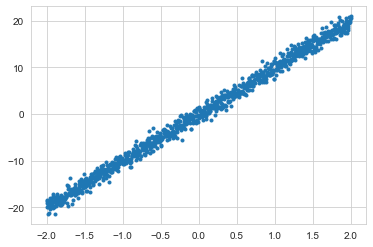

In [3]:
plt.figure()
plt.plot(
    X, y,
    marker='.',
    ls='none'
)
print(coef)

#### building the neural network

In [188]:
input_shape = [1,]

from tensorflow import keras
from tensorflow.keras import layers

# YOUR CODE HERE
# model = model = keras.Sequential([
#     layers.BatchNormalization(),
#     layers.Dense(units=512),
#     layers.Activation('relu'),
#     layers.Dense(units=1),
# ])
model = keras.Sequential([
    layers.Dense(units=1),
])

In [189]:
opt = keras.optimizers.Adam(learning_rate=0.1)

model.compile(
    optimizer=opt,
    loss='mae',
)

In [190]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=20,
    min_delta=0.001,
    restore_best_weights=True,
)

lr_schedule = keras.callbacks.ReduceLROnPlateau(
    patience=2,
    factor=0.5,
    min_lr=0.001,
)

In [191]:
history = model.fit(
    X, y,
    batch_size=8,
    epochs=1000,
    validation_split=0.2,
    callbacks=[early_stopping, lr_schedule],
)

Epoch 1/1000
100/100 [==============================] - 1s 5ms/step - loss: 4.1103 - val_loss: 1.5773
Epoch 2/1000
100/100 [==============================] - 0s 778us/step - loss: 0.8168 - val_loss: 0.7892
Epoch 3/1000
100/100 [==============================] - 0s 767us/step - loss: 0.8027 - val_loss: 0.8050
Epoch 4/1000
100/100 [==============================] - 0s 767us/step - loss: 0.8079 - val_loss: 0.8056
Epoch 5/1000
100/100 [==============================] - 0s 778us/step - loss: 0.8016 - val_loss: 0.8028
Epoch 6/1000
100/100 [==============================] - 0s 889us/step - loss: 0.7987 - val_loss: 0.8208
Epoch 7/1000
100/100 [==============================] - 0s 767us/step - loss: 0.8029 - val_loss: 0.7956
Epoch 8/1000
100/100 [==============================] - 0s 757us/step - loss: 0.7975 - val_loss: 0.8114
Epoch 9/1000
100/100 [==============================] - 0s 778us/step - loss: 0.7995 - val_loss: 0.7985
Epoch 10/1000
100/100 [==============================] - 0s 778us/

Minimum Loss: 0.7892


<AxesSubplot:>

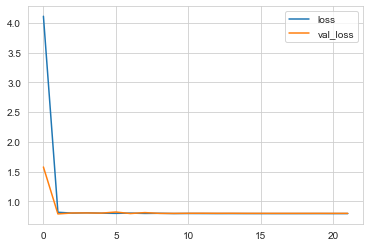

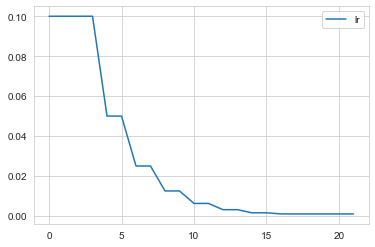

In [192]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Loss: {:0.4f}".format(history_df['val_loss'].min()));
history_df.loc[:, ['lr']].plot()

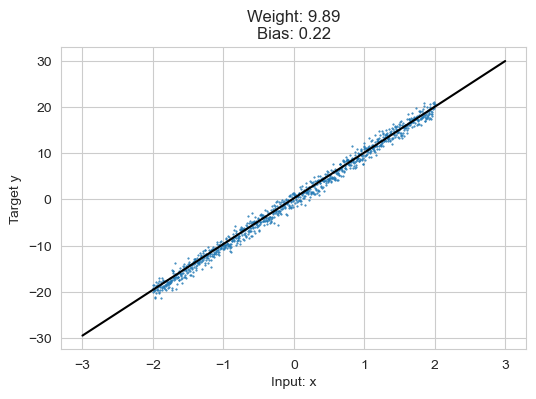

In [193]:
import tensorflow as tf
x = tf.linspace(X.min()*1.5, X.max()*1.5, 100)
y_preds = model.predict(x)

plt.figure(dpi=100)

# dataset
plt.plot(
    X, y,
    marker='.', ls='none', ms=1
)
# model
plt.plot(x, y_preds, 'k')

# plt.xlim(-1, 1)
# plt.ylim(-1, 1)
plt.xlabel("Input: x")
plt.ylabel("Target y")
w, b = model.weights # you could also use model.get_weights() here
plt.title("Weight: {:0.2f}\nBias: {:0.2f}".format(w[0][0], b[0]))
plt.show()

In [187]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [180]:
history.history

{'loss': [8.562309265136719,
  7.7472615242004395,
  6.95907735824585,
  6.262314319610596,
  5.593165874481201,
  4.986068248748779,
  4.405261039733887,
  3.8248701095581055,
  3.224203109741211,
  2.6306095123291016,
  2.0619192123413086,
  1.52471923828125,
  1.0840137004852295,
  0.8578185439109802,
  0.7929238677024841,
  0.8098458647727966,
  0.8063923716545105,
  0.7975583672523499,
  0.7951957583427429,
  0.7966414093971252,
  0.7950976490974426,
  0.7969037890434265,
  0.7949087619781494,
  0.7985594868659973,
  0.7956190705299377,
  0.7959797382354736,
  0.7974411249160767,
  0.7958477735519409,
  0.795483410358429,
  0.7949460744857788,
  0.7948141694068909,
  0.7949244976043701,
  0.7947630882263184,
  0.7948042154312134,
  0.7947840094566345,
  0.7947738170623779,
  0.7949715256690979,
  0.7945437431335449],
 'val_loss': [16.3725528717041,
  15.814409255981445,
  15.145642280578613,
  14.384490966796875,
  13.438994407653809,
  12.301352500915527,
  10.891423225402832,
  